In [28]:
!pip install ydata-profiling
!pip install pycaret
!pip plotly

ERROR: unknown command "plotly"


# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import all you need</p>

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from pycaret.classification import *
from sklearn.metrics import classification_report
from ydata_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('/kaggle/input/churn-it/IT_customer_churn.csv')
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EDA</p>

In [31]:
df.info

<bound method DataFrame.info of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL       

In [32]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [34]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Preprocessing </p>

In [35]:
def find_mv_drop(x):
    l=[]
    for i in x.columns:
        df1 = x[x[i]!=" "]
        if x.shape ==df1.shape:
            continue
        else:
            l.append(i)
            for j in l:
                df = x[x[j]!=" "]
    print(l)
    return df
df=find_mv_drop(df)

['TotalCharges']


In [36]:
def uniquer(x):
    for i in x.columns:
        if x[i].dtypes == 'object':
            print(f'{i}: {x[i].unique()} --> {x[i].dtypes}')
    print(df.shape)
uniquer(df)

gender: ['Female' 'Male'] --> object
Partner: ['Yes' 'No'] --> object
Dependents: ['No' 'Yes'] --> object
PhoneService: ['No' 'Yes'] --> object
MultipleLines: ['No phone service' 'No' 'Yes'] --> object
InternetService: ['DSL' 'Fiber optic' 'No'] --> object
OnlineSecurity: ['No' 'Yes' 'No internet service'] --> object
OnlineBackup: ['Yes' 'No' 'No internet service'] --> object
DeviceProtection: ['No' 'Yes' 'No internet service'] --> object
TechSupport: ['No' 'Yes' 'No internet service'] --> object
StreamingTV: ['No' 'Yes' 'No internet service'] --> object
StreamingMovies: ['No' 'Yes' 'No internet service'] --> object
Contract: ['Month-to-month' 'One year' 'Two year'] --> object
PaperlessBilling: ['Yes' 'No'] --> object
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] --> object
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5'] --> object
Churn: ['No' 'Yes'] --> object
(7032, 20)


In [37]:
def rep(x):
    x.replace("No internet service", "No", inplace=True)
    x.replace("No phone service", "No", inplace=True)
    df=pd.get_dummies(x, columns=['Contract', 'PaymentMethod', 'InternetService'], prefix=['Contract', 'PaymentMethod', 'InternetService'])
    return df

df=rep(df)

In [38]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

df['gender'].replace({'Male': 1,'Female': 0},inplace=True)

In [39]:
from sklearn.compose import make_column_transformer

scaler = MinMaxScaler()

In [40]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [41]:
uniquer(df)

(7032, 27)


In [42]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,0.000000,0,0,0,1,0,...,True,False,False,False,False,True,False,True,False,False
1,1,0,0,0,0.464789,1,0,1,0,1,...,False,True,False,False,False,False,True,True,False,False
2,1,0,0,0,0.014085,1,0,1,1,0,...,True,False,False,False,False,False,True,True,False,False
3,1,0,0,0,0.619718,0,0,1,0,1,...,False,True,False,True,False,False,False,True,False,False
4,0,0,0,0,0.014085,1,0,0,0,0,...,True,False,False,False,False,True,False,False,True,False


# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Visualization</p>

In [43]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Find best model</p>

In [44]:
mpt=setup(data = df,target = 'Churn',session_id = 123)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7032, 27)"
4,Transformed data shape,"(7032, 27)"
5,Transformed train set shape,"(4922, 27)"
6,Transformed test set shape,"(2110, 27)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [45]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8033,0.8441,0.5505,0.6547,0.5977,0.4689,0.4722,0.5420
ada,Ada Boost Classifier,0.8025,0.8452,0.5237,0.6634,0.5840,0.4572,0.4634,0.1170
ridge,Ridge Classifier,0.8013,0.8371,0.5237,0.6599,0.5835,0.4553,0.4609,0.0220
lda,Linear Discriminant Analysis,0.7993,0.8368,0.5574,0.6415,0.5962,0.4635,0.4658,0.0230
gbc,Gradient Boosting Classifier,0.7979,0.8455,0.5130,0.6533,0.5743,0.4443,0.4502,0.3580
catboost,CatBoost Classifier,0.7978,0.8402,0.5222,0.6493,0.5784,0.4476,0.4524,2.1190
lightgbm,Light Gradient Boosting Machine,0.7940,0.8318,0.5390,0.6325,0.5816,0.4462,0.4489,31.8050
rf,Random Forest Classifier,0.7918,0.8221,0.5069,0.6363,0.5638,0.4294,0.4345,0.2650
xgboost,Extreme Gradient Boosting,0.7832,0.8168,0.5252,0.6077,0.5630,0.4199,0.4222,0.0800
svm,SVM - Linear Kernel,0.7822,0.8347,0.4885,0.6458,0.5326,0.3990,0.4187,0.0310


In [46]:
lr=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8134,0.8174,0.5344,0.6931,0.6034,0.4841,0.4911
1,0.7850,0.8298,0.4885,0.6214,0.5470,0.4087,0.4138
2,0.8394,0.8949,0.6308,0.7257,0.6749,0.5690,0.5714
3,0.7886,0.8564,0.5154,0.6204,0.5630,0.4252,0.4284
4,0.7744,0.8080,0.5191,0.5862,0.5506,0.4007,0.4021
5,0.8089,0.8412,0.5802,0.6609,0.6179,0.4912,0.4931
6,0.8089,0.8536,0.5802,0.6609,0.6179,0.4912,0.4931
7,0.8089,0.8607,0.5725,0.6637,0.6148,0.4886,0.4910
8,0.8069,0.8352,0.5725,0.6579,0.6122,0.4845,0.4866


In [47]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

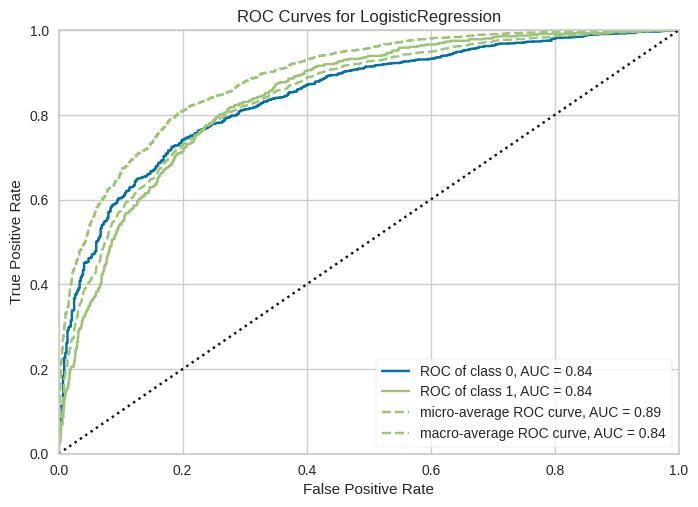

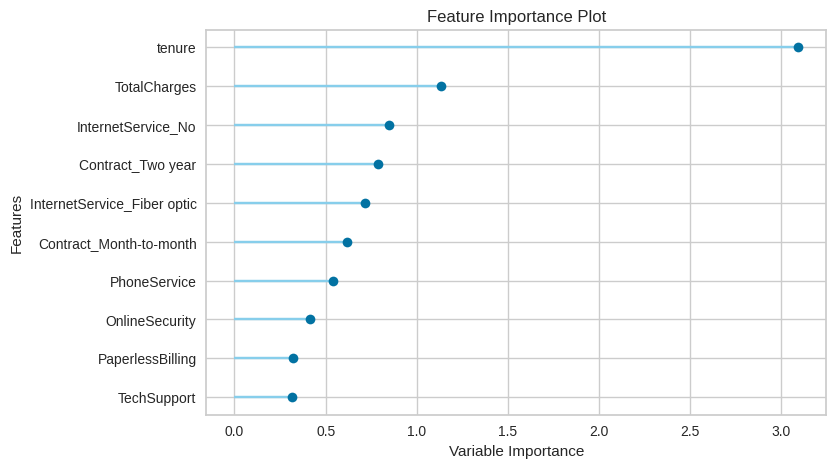

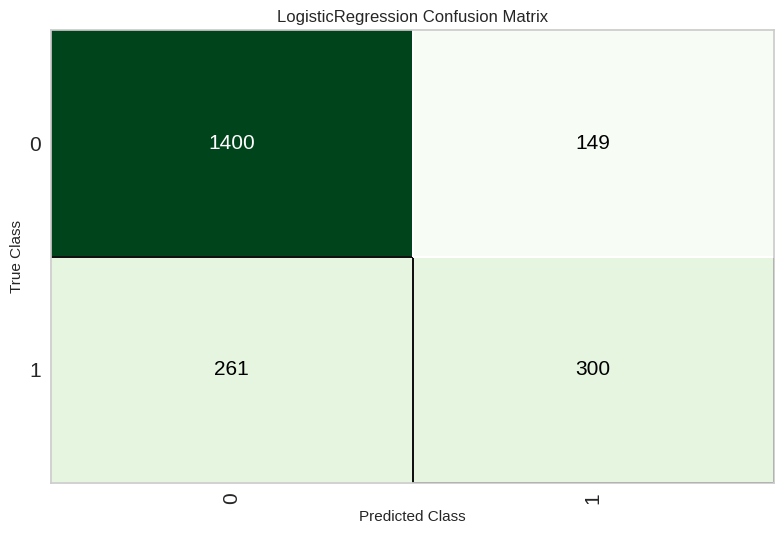

In [48]:
plot_model(lr, plot='auc')

plot_model(lr, plot='feature')

plot_model(lr, plot='confusion_matrix')

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">build best model</p>

In [49]:
from sklearn.linear_model import LogisticRegression

def log_reg(X_train, y_train, X_test, y_test, weights):
    if weights==-1:
        model = LogisticRegression()
    else:
        model = LogisticRegression(class_weight={0:weights[0], 1:weights[1]})

    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print("Accuracy", acc, "\n")

    y_pred = model.predict(X_test)
    print("preds", y_pred[:5], "\n")

    cl_rep = classification_report(y_test,y_pred)
    print(cl_rep)

In [50]:
from imblearn.over_sampling import SMOTE

X = df.drop('Churn',axis='columns')
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

print(y_sm.value_counts())


weights = -1 # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Churn
0    5163
1    5163
Name: count, dtype: int64
Accuracy 0.8031272210376688 

preds [0 0 0 0 1] 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [51]:
count_class_0, count_class_1 = df['Churn'].value_counts()

df_class_0 = df[df['Churn'] == 0]
df_class_1 = df[df['Churn'] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
print(y_train.value_counts())

weights = -1 # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test, weights)

Churn
1    4130
0    4130
Name: count, dtype: int64
Accuracy 0.7681510164569216 

preds [1 0 1 0 0] 

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1033
           1       0.75      0.81      0.78      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



In [ ]:
logreg = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg'],  # Different optimization solvers
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization type (some solvers don’t support all penalties)
    'max_iter': [100, 200, 500, 1000],  # Number of iterations for convergence
    'tol': [1e-4, 1e-3, 1e-2],  # Tolerance for stopping criteria
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
bmodel = grid_search.fit(X_train, y_train)

# Output best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy with Best Hyperparameters:", test_accuracy)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best Hyperparameters: {'C': 100, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}
Best Cross-Validation Accuracy: 0.7667070217917675
Test Accuracy with Best Hyperparameters: 0.7671829622458858


# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Save best model</p>

In [53]:
import joblib
joblib.dump(bmodel,'churn_tel.joblib')


['churn_tel.joblib']